In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
pip install impyute #Download MICE package

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import nan 
import tensorflow as tf
from numpy.random import seed

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
cd '/content/gdrive/My Drive/Machine learning projects/Indian diabetic data'

/content/gdrive/My Drive/Machine learning projects/Indian diabetic data


In [5]:
data = pd.read_csv('diabetes.csv')

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.info() #No null types in the whole dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#Checking out the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
#LETS SEE WHAT ALL THE DATA REPRESENTS
# Pregnancies- Number of past pregnancies of the patient
# Glucose - Plasma glucose concentration(mg/dL)
# Blood Pressure- Diastolic blood pressure (mm Hg)
# Skin Thickness- Triceps skin fold thickness (mm)
# Insulin- 2-Hour serum insulin (mu U/ml)
# BMI- Body mass index (weight in kg/(height in m)^2)
# Diabetes Pedigree Function- It determines whether a trait has a dominant or recessive pattern of inheritance.It is calculated when a patient has a diabetes history in the family.
# Age- Age (years)
# Outcome- Whether a person has diabetes or not( 0=No, 1=Yes)

In [11]:
#Some datas missing values are hidden as the value '0'
#For example SkinThickness can never be 0

def counting_values(columns):
  return data[columns].value_counts()

In [12]:
counting_values('Glucose') #5 missing values in the glucose coloumns

100    17
99     17
129    14
125    14
111    14
       ..
177     1
172     1
169     1
160     1
199     1
Name: Glucose, Length: 136, dtype: int64

In [13]:
counting_values('BloodPressure') #35 missing values in the data

70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
92      8
75      8
65      7
94      6
85      6
48      5
44      4
96      4
110     3
100     3
98      3
106     3
108     2
104     2
30      2
55      2
46      2
40      1
38      1
24      1
95      1
61      1
102     1
114     1
122     1
Name: BloodPressure, dtype: int64

In [14]:
counting_values('SkinThickness') #227 missing values in the data

0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     19
39     18
19     18
29     17
37     16
26     16
22     16
40     16
25     16
35     15
41     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
34      8
46      8
38      7
12      7
14      6
16      6
11      6
43      6
45      6
10      5
44      5
48      4
47      4
50      3
49      3
54      2
52      2
7       2
8       2
60      1
56      1
63      1
51      1
99      1
Name: SkinThickness, dtype: int64

In [15]:
counting_values('Insulin') #374 0 insulin values

0      374
105     11
140      9
130      9
120      8
      ... 
271      1
270      1
108      1
112      1
846      1
Name: Insulin, Length: 186, dtype: int64

In [16]:
counting_values('BMI') #11 missing values

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
        ..
32.1     1
52.9     1
31.3     1
45.7     1
42.8     1
Name: BMI, Length: 248, dtype: int64

In [17]:
counting_values('DiabetesPedigreeFunction') #No missing values in the dataset

0.254    6
0.258    6
0.259    5
0.238    5
0.207    5
        ..
0.886    1
0.804    1
1.251    1
0.382    1
0.375    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64

In [18]:
counting_values('Age') #No missing values in the dataset

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

In [19]:
#So the coloumn that has missing values are Glucose,BloodPressure,SkinThickness,Insulin and BMI

In [20]:
#Before that let's look the distribution and outliers for all the data
def boxplots(column,datas):
  return sns.boxplot(column,data=datas)

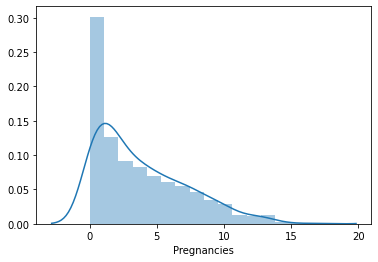

In [21]:
sns.distplot(data.Pregnancies)

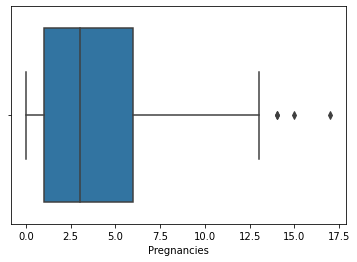

In [22]:
#Creating boxplot
boxplots('Pregnancies',data)

In [23]:
#Treating outliers in the pregnancy coloumn
#Let's count all the values of the pregnancy first
counting_values('Pregnancies')
#Looks like 14,15,17 are the outliers

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [24]:
#Replacing the outliers with NaN value so that we can use MICE impute later
data['Pregnancies']= data['Pregnancies'].replace(14,np.nan)
data['Pregnancies']= data['Pregnancies'].replace(15,np.nan)
data['Pregnancies']= data['Pregnancies'].replace(17,np.nan)

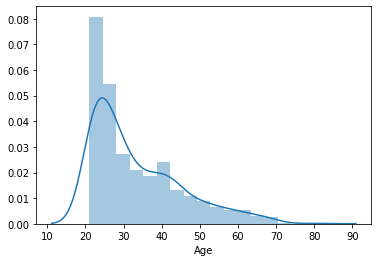

In [25]:
#The remaining coloumn that has no missing values are Age but let's check the distributiona and outliers for them
sns.distplot(data.Age)

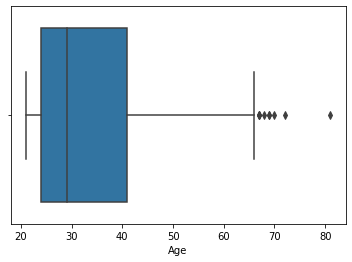

In [26]:
#Boxplot for age
boxplots('Age',data)
#Looks like the outliers in Age are between 65-85 years old which makes sense so I will not take it as an outlier

In [27]:
#Let's check the unique value of Age
counting_values('Age')

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

In [28]:
#Looks like 81 is the outlier so we will replace it with NaN
data['Age'] = data['Age'].replace(81,np.nan)

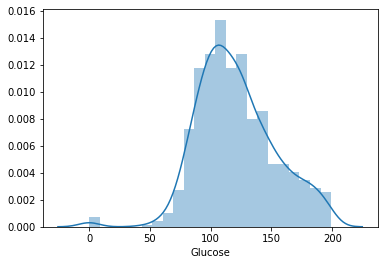

In [29]:
#Let's check the distribution and outliers in Glucose
sns.distplot(data.Glucose)
#Looks like glucose is evenly distributed

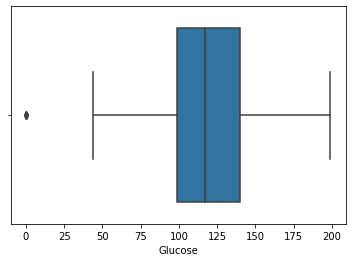

In [30]:
boxplots('Glucose',data) #Looks like 0 is the outlier as 0 can't be a blood pressure reading

In [31]:
data['Glucose']= data['Glucose'].replace(0,np.nan)

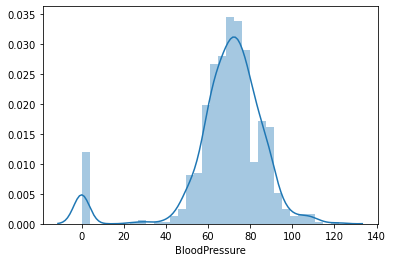

In [32]:
#Let's check for the blood pressure
sns.distplot(data.BloodPressure) #Looks like there are alot of data distribution in bloodpressure at 0

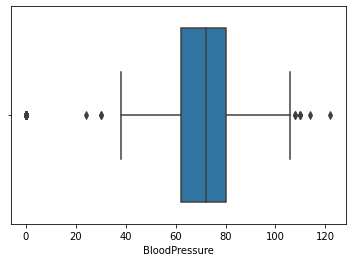

In [33]:
#Let's confirm it with outliers plot
boxplots('BloodPressure',data)

In [34]:
#Looks like there are quite a few of outliers in bloodpressure data
#0 and between 20 and 40
#Let's check the unique value of blood pressure here and identify the numbers referenced by boxplot
counting_values('BloodPressure') #35 patients with 0 measurement
                                 #1 patients with 24 blood pressure
                                 #2 patients with 30 blood pressure

70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
92      8
75      8
65      7
94      6
85      6
48      5
44      4
96      4
110     3
100     3
98      3
106     3
108     2
104     2
30      2
55      2
46      2
40      1
38      1
24      1
95      1
61      1
102     1
114     1
122     1
Name: BloodPressure, dtype: int64

In [35]:
#Replacing it with NaN
data['BloodPressure']= data['BloodPressure'].replace(0,np.nan)
data['BloodPressure']= data['BloodPressure'].replace(24,np.nan)
data['BloodPressure']= data['BloodPressure'].replace(30,np.nan)
data['BloodPressure']= data['BloodPressure'].replace(122,np.nan)

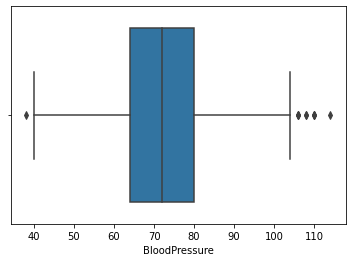

In [36]:
boxplots('BloodPressure',data) #38 is still the outlier but there are occasions where a patient has 38 blood pressure so we leave it as it is
#highest 122 was skewed heavily and it was present as outliers so we removed it

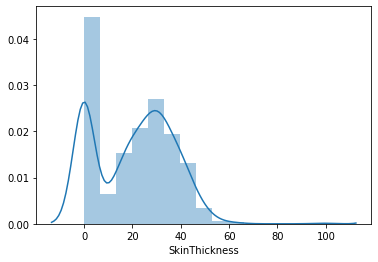

In [37]:
#Let's look for skinthickness
sns.distplot(data.SkinThickness) #Yikes. Data is heavily distributed in skin 0 so we have to sort it out

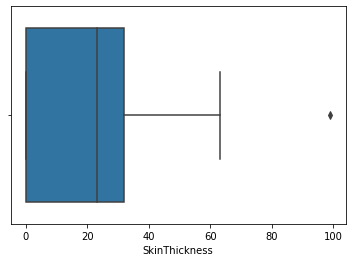

In [38]:
#Let's check the boxplot for outliers on skinthickness
boxplots('SkinThickness',data) #Although the boxplot doesn't indicate the thickness of 0 as outliers
                              #we obviously know that it's not possible to have 0 skinthickness


In [39]:
#Let's treat 120 and 0 cases
data['SkinThickness']= data['SkinThickness'].replace(0,np.nan)
data['SkinThickness']= data['SkinThickness'].replace(120,np.nan)

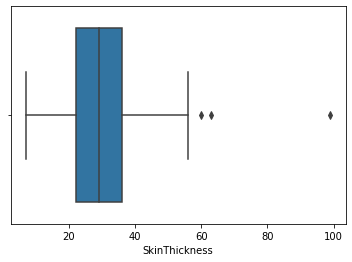

In [40]:
boxplots('SkinThickness',data)

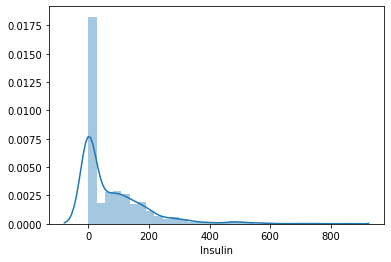

In [41]:
#Let's look for Insulin
sns.distplot(data.Insulin) #Looks like there is alot of data distribution in 0.

In [42]:
#Before checking the outliers let's sort out the 0 issues
data['Insulin']= data['Insulin'].replace(0,np.nan)

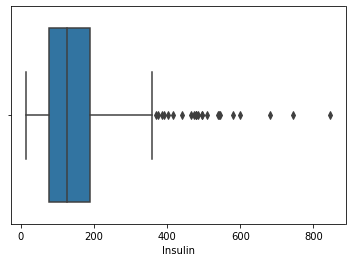

In [43]:
#Let's check the boxplot
boxplots('Insulin',data)

In [44]:
#Treating the outliers
data['Insulin'] = data['Insulin'][data['Insulin']<=450] 

In [45]:
data.isnull().sum(axis=0)

Pregnancies                   4
Glucose                       5
BloodPressure                39
SkinThickness               227
Insulin                     391
BMI                           0
DiabetesPedigreeFunction      0
Age                           1
Outcome                       0
dtype: int64

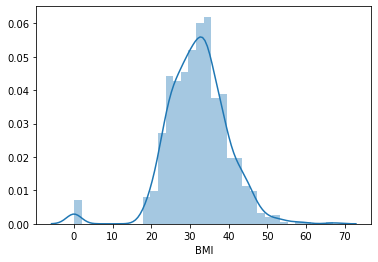

In [46]:
#FOR BMI
#Checking the hist plot
sns.distplot(data.BMI)
#Looks like BMI is evenly distributed but there is heavy data screwin around the value 0 and since there is no such thing as 0 body mass index

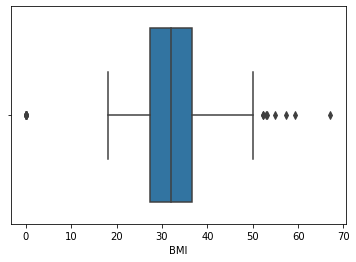

In [47]:
boxplots('BMI',data)

In [48]:
#Removing the outliers
data['BMI']= data['BMI'].replace(0,np.nan)
data['BMI'] = data['BMI'][data['BMI']<=60]

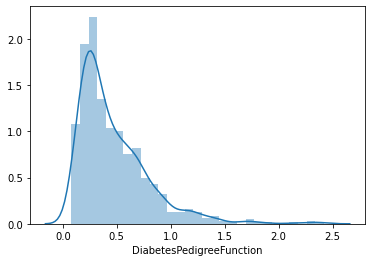

In [49]:
sns.distplot(data.DiabetesPedigreeFunction)

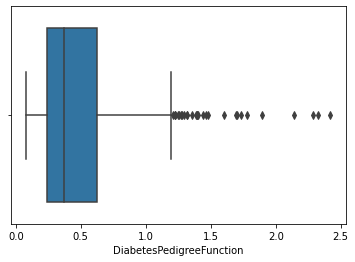

In [50]:
boxplots('DiabetesPedigreeFunction',data)

In [51]:
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'][data['DiabetesPedigreeFunction']<=1.5] 

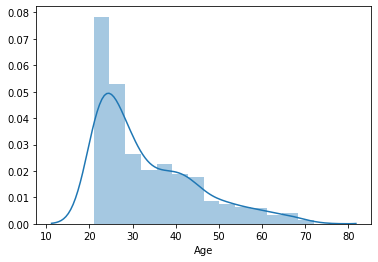

In [52]:
# For the age columns
sns.distplot(data.Age) #Looks like there are alot of people betweern 20-30 in this dataset#

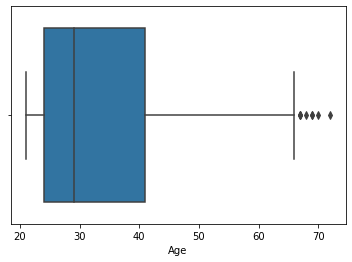

In [53]:
boxplots('Age',data)

In [54]:
#Treating the outliers for age
data['Age'] = data['Age'][data['Age']<=70] 

In [55]:
#Converting the dependent variable float value to int value
cols = ['Outcome']
data[cols] = data[cols].applymap(np.int64)

In [56]:
#Performing this task again to insure that there is no vlaue 0 in each coloumn data where it's impossible to have 0 value
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']]=data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']].replace(0,nan) 

In [57]:
#Adding values in the missing data
#The procedure we use is called MICE imputer. It is much more effective than adding mean value in the empty data,
#It treats each coloumns with missing values as the dependent variable in a regression, with some or all the remaining variables as its predictors. the MICE procedure runs through models, 
#fitting each in turn, then uses a procedure called 'predictive mean matching' to generate random draws from the predictive distributions determined by the fitted models.
# The random draws become the imputed values for one imputed dataset


#MICE imputation has a number of advantage over these other missing data techniques.
# MICE imvolves filling the missing values multiple times, creating miltiple 'complete dataset'

from impyute.imputation.cs import mice
X = data.drop('Outcome',axis=1)
Y = data['Outcome']
imputed = mice(X.values)

In [58]:
dataframe = pd.DataFrame(imputed,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [59]:
#Let's map out the correlation map 
def corr(data):
  corr = data.corr()
  return corr.style.background_gradient(cmap='coolwarm')

In [60]:
#Concatening the Outcome variable with the dataframe we created
dependent_variable = data['Outcome']

In [61]:
dataframe = pd.concat([dataframe,dependent_variable],axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


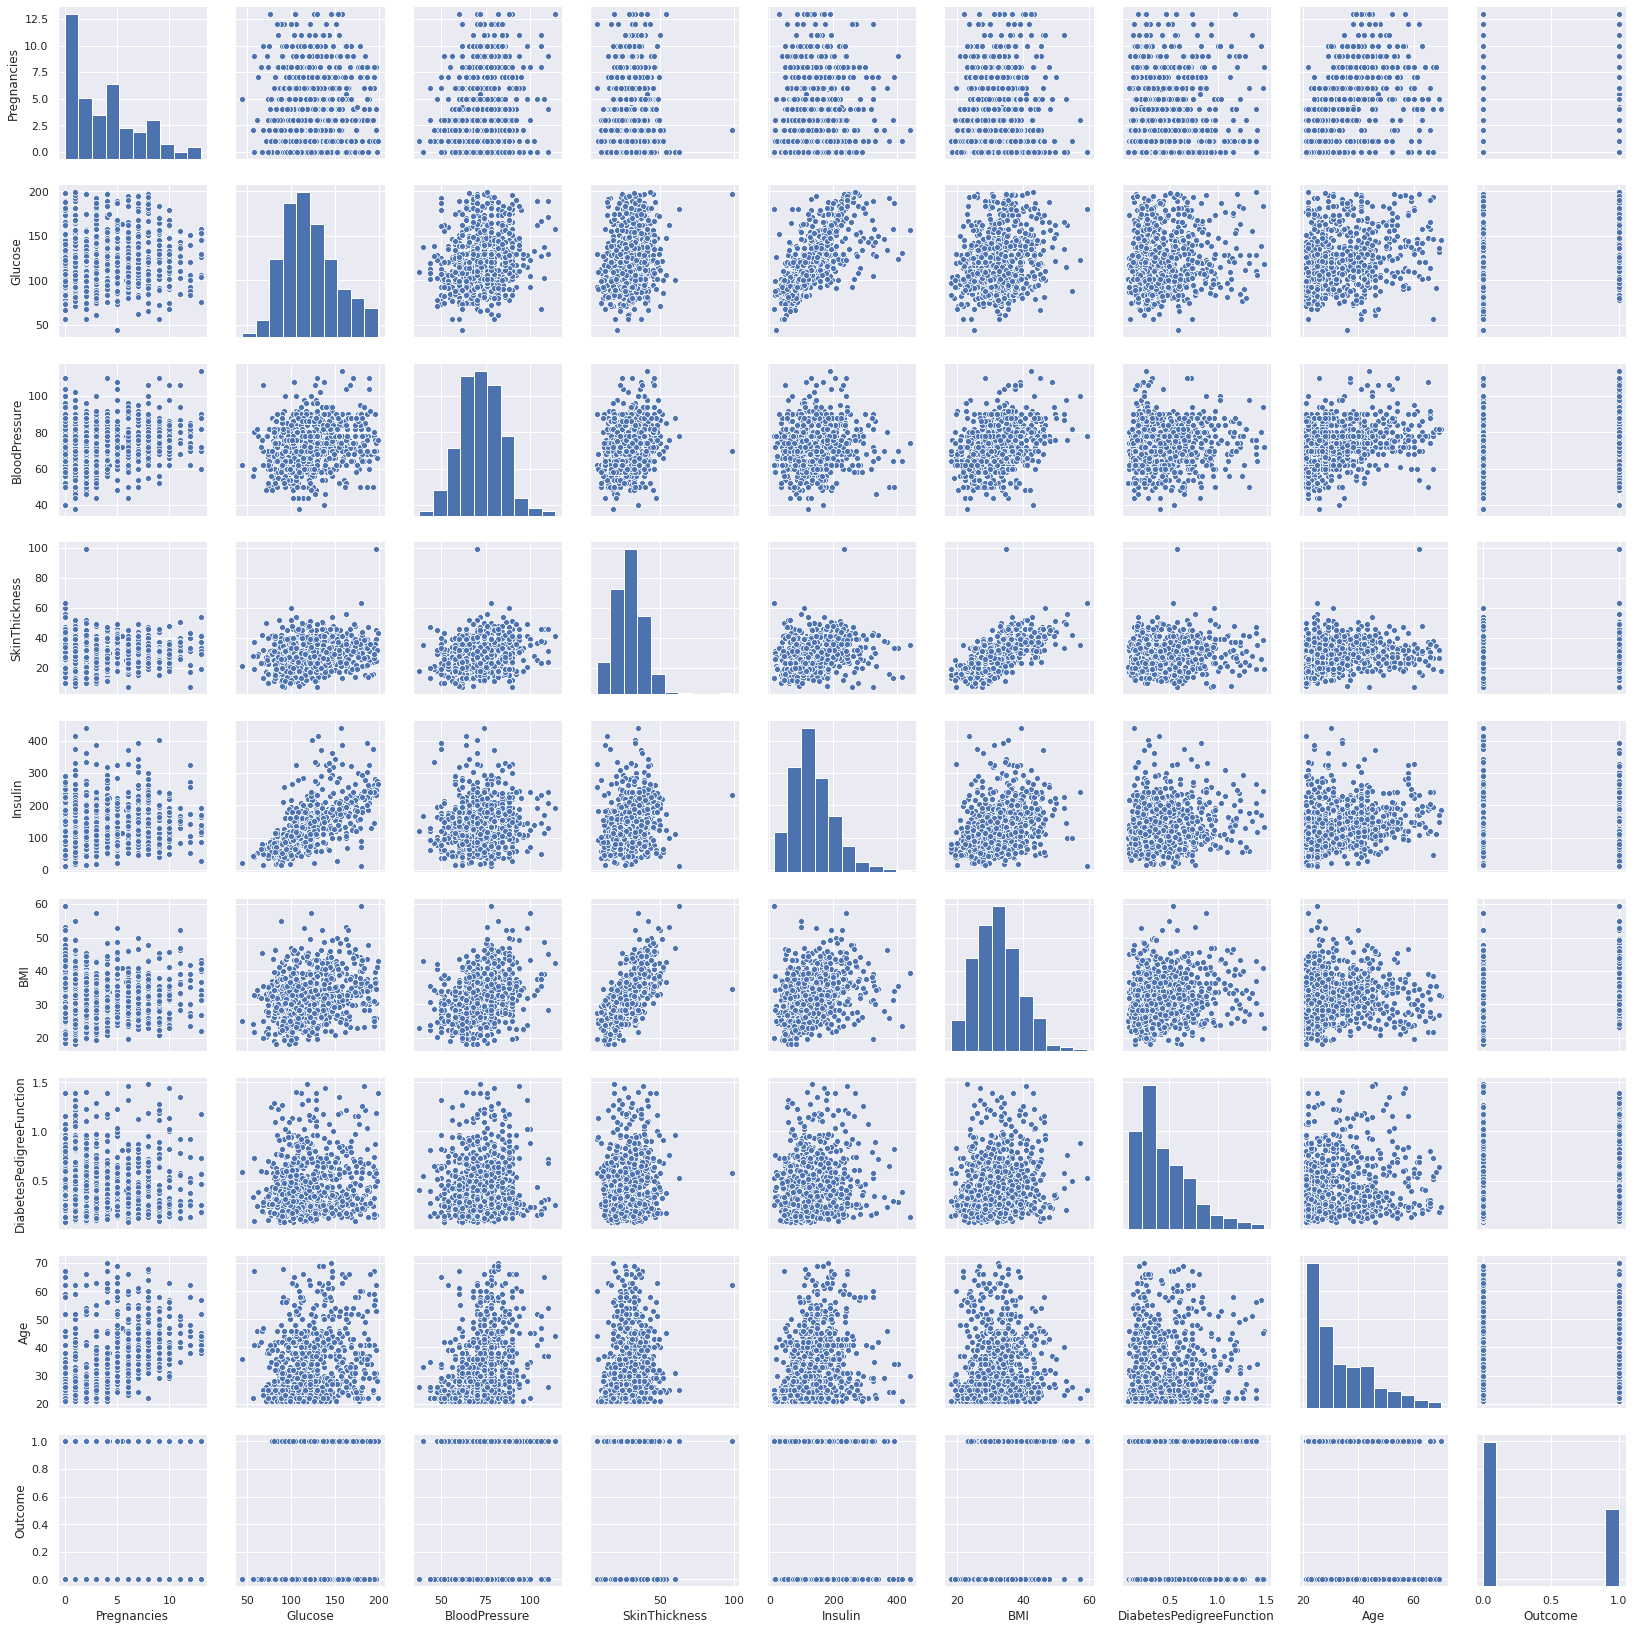

In [62]:
#Using scatter plot to see the relations between all the coloumns with each other
sns.set()
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
sns.pairplot(dataframe[cols],size=2.5)
plt.show()

In [63]:
corr(dataframe)
#Looking at the data we can see that:
#Age is heavily correlated with pregnancies
#Glucose with Insulin
#Bloodpressure with age
#Skinthickness with BMI

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.121608,0.225127,0.108174,0.123911,0.018480,0.013743,0.552454,0.207089
Glucose,0.121608,1.000000,0.229817,0.242856,0.697281,0.238607,0.105393,0.272711,0.495243
BloodPressure,0.225127,0.229817,1.000000,0.270005,0.136554,0.337540,0.035062,0.346129,0.188319
SkinThickness,0.108174,0.242856,0.270005,1.000000,0.244682,0.714301,0.081854,0.153153,0.279760
Insulin,0.123911,0.697281,0.136554,0.244682,1.000000,0.309945,0.129584,0.231637,0.374397
BMI,0.018480,0.238607,0.337540,0.714301,0.309945,1.000000,0.125872,0.045770,0.313180
DiabetesPedigreeFunction,0.013743,0.105393,0.035062,0.081854,0.129584,0.125872,1.000000,0.063343,0.189668
Age,0.552454,0.272711,0.346129,0.153153,0.231637,0.045770,0.063343,1.000000,0.249040
Outcome,0.207089,0.495243,0.188319,0.279760,0.374397,0.313180,0.189668,0.249040,1.000000


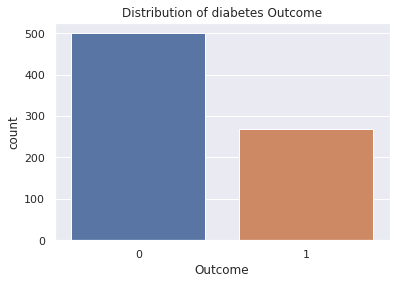

In [64]:
#Counting the dependent variable data distribution
sns.countplot(dataframe['Outcome']).set_title('Distribution of diabetes Outcome')
plt.show()
#The data distribution seems pretty balanced and looks like there is no necessity of stratification

In [65]:
X = dataframe.drop(['Outcome'],axis=1)
Y = dataframe['Outcome']

In [66]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [67]:
#Standard scaling the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [68]:
#Scaling the X_train and X_test
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [69]:
#Let's start the model with a RandomForest tree
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='entropy',n_estimators=95) #Changed from gini to entropy and from estimators 40 to 95 after gridsearch
classifier.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=95,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
#Prediction using random forest
Y_pred = classifier.predict(X_test)

In [71]:
#Using the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[93, 14],
       [16, 31]])

In [72]:
#Using gridsearch CV to improve the results (Random Forest)
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion':['gini','entropy'],'n_estimators':np.arange(1,100)}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv=10)

In [73]:
#Using cross validation to find the percentage accuracy --
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,X = X_train, y = Y_train, cv = 10, n_jobs=-1)
mean_data = accuracies.mean()

In [74]:
mean_data #The accuracy is 74% for RandomForest

0.7377842411422527

In [75]:
#Accuracy score of the random forest
from sklearn.metrics import accuracy_score
random_forest_accuracy_score = accuracy_score(Y_test,Y_pred)
random_forest_accuracy_score

0.8051948051948052

In [76]:
#Using K nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [5,10,15,25,30,50]}
grid_knn = GridSearchCV(knn,param_grid,scoring='accuracy',cv=10,refit=True)

In [77]:
KNN_classifier = grid_knn.fit(X_train,Y_train) #Accuracy is 74% for KNN
print('Best score is:',grid_knn.best_score_)
print('Best parameters:',grid_knn.best_params_)
print('Accuracy on training set:',grid_knn.score(X_train,Y_train))
print('Accuracy on test set: ',grid_knn.score(X_test,Y_test))

Best score is: 0.742702273929138
Best parameters: {'n_neighbors': 25}
Accuracy on training set: 0.7638436482084691
Accuracy on test set:  0.7922077922077922


In [78]:
#Stopping the randomness
tf.random.set_seed(0)

In [79]:
#Using an Artificial Neural Network
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [80]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=10,activation='relu'))
classifier.add(tf.keras.layers.Dense(units=10,activation='relu'))
classifier.add(tf.keras.layers.Dense(units=8,activation='relu'))
classifier.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [81]:
history = classifier.fit(X_train,Y_train,batch_size=25,epochs=350) #Looks like the dip is in 85% and the accuracy is 80%

Epoch 1/350
25/25 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.6238
Epoch 2/350
25/25 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.6368
Epoch 3/350
25/25 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.6401
Epoch 4/350
25/25 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.6384
Epoch 5/350
25/25 [==============================] - 0s 2ms/step - loss: 0.6198 - accuracy: 0.6401
Epoch 6/350
25/25 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.6401
Epoch 7/350
25/25 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.6401
Epoch 8/350
25/25 [==============================] - 0s 1ms/step - loss: 0.5653 - accuracy: 0.6401
Epoch 9/350
25/25 [==============================] - 0s 1ms/step - loss: 0.5539 - accuracy: 0.6401
Epoch 10/350
25/25 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.6401
Epoch 11/

In [82]:
#Checking the accuracy in the test set
y_pred = classifier.predict(X_test)
predictions = pd.DataFrame(y_pred)
predictions = (predictions>0.5)
predictions = predictions.astype(int)
predictions = predictions.T.squeeze() #Converting dataframe into series
predictions

0      1
1      0
2      0
3      1
4      0
      ..
149    1
150    0
151    0
152    0
153    0
Name: 0, Length: 154, dtype: int64

In [83]:
#Using the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,predictions) 

array([[88, 19],
       [11, 36]])

In [84]:
#Plotting accuracy and loss in keras
print(history.history.keys())


dict_keys(['loss', 'accuracy'])


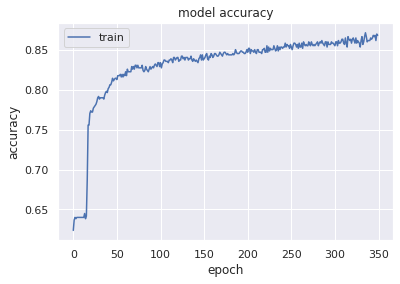

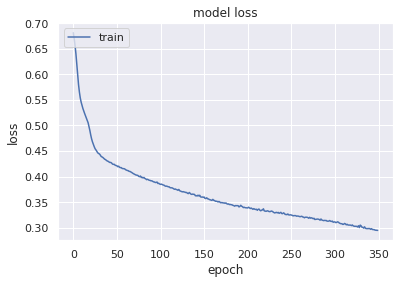

In [85]:
#History for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [86]:
#Accuracy score of the random forest
from sklearn.metrics import accuracy_score
ANN_accuracy_score = accuracy_score(Y_test,predictions)
ANN_accuracy_score

0.8051948051948052

In [87]:
#Looks like ANN isn't performing well than we expected. Let's look at XGB boost algorithm

In [88]:
#Using heirarchy clustering method
#Learn more about XGB boost
import xgboost as xgb
model = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [89]:
xgb_predictions = model.predict(X_test)

In [90]:
#Using confusion matrix
confusion_matrix_accuracy = confusion_matrix(Y_test,xgb_predictions)
confusion_matrix_accuracy

array([[90, 17],
       [14, 33]])

In [91]:
#Using cross validation to find the percentage accuracy in XGB boost -- 75% accuracy. Slightly better than the other model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model,X = X_train, y = Y_train, cv = 10, n_jobs=-1)
mean_accuracy_xgb = accuracies.mean()
mean_accuracy_xgb

0.7540719196192491

In [92]:
#Accuracy score of the XGB boost is 79% (Almost the same as the Artificial Neural Network)
XGB_accuracy_score = accuracy_score(Y_test,xgb_predictions)
XGB_accuracy_score

0.7987012987012987